**COMPUT MCMD course sping 2019, home work for week 2** 

**By: Samuel Wiqvist** 


#### Introduction 

We will use Monte Carlo methods to analyses stellar populations within clusters.

#### Set-up

The first step it to load the packages that we will use for our calculations, and to fix the random numbers (such that we get the same result each time we run our analyses).

In [1]:
using PyPlot # for plotting
using Statistics # for computing statistics 
using Random # for fixing the random numbres used 

Random.seed!(123); # fix random numbers 

Regarding our calculations: In all our calculations we let $M_{\circ} = 1$.

#### The mass distribution for stars

We first plot the distribution (i.e. the power law) for masses in stars.

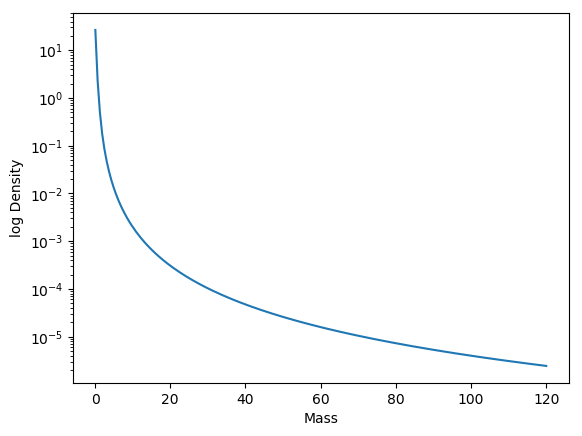

In [4]:
# density function for the mass 
function f(x)

    if x >= 0.08 && x <= 0.5
        γ = 1.3
    elseif x >= 0.5 && x <= 1
        γ = 2.2
    else
        γ = 2.7
    end

    return x^(-γ)

end

# compute desity  
x = LinRange(0.08,120, 200)
density = zeros(length(x))
for i in 1:length(x); density[i] = f(x[i]); end

# plot desity function
PyPlot.figure()
PyPlot.semilogy(x, density)
PyPlot.xlabel("Mass")
PyPlot.ylabel("log Density");

#### Sampling stars with masses according to the density function

To sample stars with masses according to the density function that we have been given we use the hit-and-miss method. This hit-and-miss method is quite inefficient in this case, and for instance, using an importance distribution would probably make our calculations more efficient. 

In [3]:
# hit-and-miss method to sample stars with masses accoring to the density function f
function hitandmiss(N_stars)

    y_max = round(f(0.08)) 

    N_acc = 0

    stars = zeros(N_stars)

    for i = 1:N_stars

        generate = true

        while generate
            x_star = 0.08+(120-0.08)*rand()
            y_star = y_max*rand()

            if y_star <= f(x_star)
                generate = false
                stars[i] = x_star
            end

        end

    end

    return stars

end;


#### The probability that a cluster with $N_{\star}$ stars produces at least one supernovae

If the cluster contains stars with masses larger than $8 M_{\circ}$, then these stars will explode as a supernovae. We will now compute the probability that a cluster with $N_{\star}=100, 300,1000$ stars contains at least one supernova, i.e. at least on star with mass larger than $8 M_{\circ}$.

We now compute the probabilities by sampling $\tilde{N}$ clusters with $N_{\star}=100,300,1000$ stars using the hit-and-miss method. After sampling the clusters we then estimating the probability that a cluster contains at least one supernovae.

In [4]:
N_clusters = 100 # nbr of clusters 
N_stars = [100,300,1000] # nbr of stars in a clusters
nbr_supernovae = zeros(N_clusters, length(N_stars)) # pre-allocated matrix to store number of supernoveas in each cluster

# generate clusters and find number of supernovae in each cluster
for i in 1:length(N_stars)
    for j in 1:N_clusters
        nbr_supernovae[j,i] = length(findall(x -> x > 8, hitandmiss(N_stars[i])))
    end
end

# comute probabiltiy that a cluster contains at least one supernova
prob_supernovae = zeros(length(N_stars))

for i in 1:length(N_stars)
    prob_supernovae[i] =  length(findall(x -> x > 0, nbr_supernovae[:,i]))/N_clusters
end

print(prob_supernovae)


[0.26, 0.61, 0.95]

We obtain following probabilities for stars with masses larger than $8 M_{\circ}$:

$P(\text{at least on star with mass} > M_{\circ})_{N_{\star}=100} = 0.26$

$P(\text{at least on star with mass} > M_{\circ})_{N_{\star}=300} = 0.61$

$P(\text{at least on star with mass} > M_{\circ})_{N_{\star}=1000} = 0.95$

The next task is to compute the probability for stars with masses larger than $8 M_{\circ}$ in clusters with $50 \leq N_{\star} \leq 5000$ number of stars.

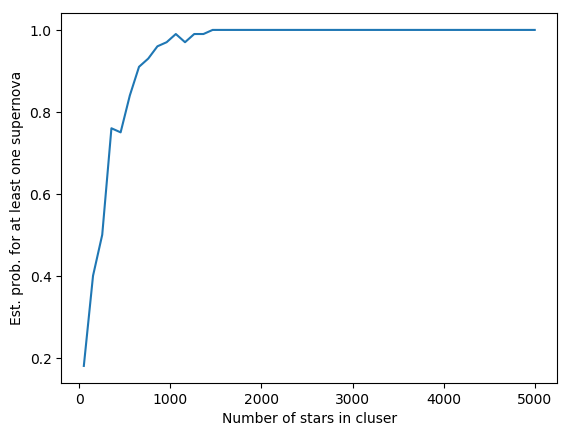

In [5]:
N_stars = floor.(Int,LinRange(50,5000,50))
nbr_supernovae = zeros(N_clusters, length(N_stars))

# generate clusters and find number of supernovae in each cluster
for i in 1:length(N_stars)
    for j in 1:N_clusters
        nbr_supernovae[j,i] = length(findall(x -> x > 8, hitandmiss(N_stars[i])))
    end
end


# compute probabiltiy that a cluster contains at least one supernova
prob_supernovae = zeros(length(N_stars))

for i in 1:length(N_stars)
    prob_supernovae[i] =  length(findall(x -> x > 0, nbr_supernovae[:,i]))/N_clusters
end


PyPlot.figure()
PyPlot.plot(N_stars, prob_supernovae)
PyPlot.xlabel("Number of stars in cluser")
PyPlot.ylabel("Est. prob. for at least one supernova");


We can now conclude that the probability for at least one supernova is low if the cluster contains few stars and that the probability for at least on supernova converges to 1 when the cluster size increases, which is as expected. 

The next task is to compute the mean, median and lower quantile (the Q1 quantile) expected number of supernovae for a cluster with $N_{\star} = 5000$ stars. For this task we generate 100 clusters with $N_{\star} = 5000$ stars and compute statistics for the population of clusters.

In [7]:
# set number of starts and number of clusters to generate

N_clusters = 100
N_stars = 5000
nbr_supernovae = zeros(N_clusters)

for i in 1:N_clusters
    nbr_supernovae[i] = length(findall(x -> x > 8, hitandmiss(N_stars)))
end

println(mean(nbr_supernovae))
println(median(nbr_supernovae))
println(quantile(nbr_supernovae, 0.25))


18.95
19.0
15.75


We obtain following statistics:

$\text{mean} = 18.95$

$\text{median} = 10.9$

$Q_1 = 15.75$


#### Number of stars in a cluster with a supernova with $M_{\text{sn}} \geq 25 M_{\circ}$

We are now interested in investigating how many stars there are in a cluster such that the cluster contains a supernova with mass $M_{\text{sn}} \geq 25 M_{\circ}$. This question is of particular interest since our own sum is believed to have formed in such a cluster. 

To investigate this we compaute generate $\tilde{N}$ clusters, for each cluster we then generate stars until one of the stars has  a mass $\geq 25 M_{\circ}$. We then plot the numbers of stars that we need in a cluster, such that the cluster contains one start with a mass $\geq 25 M_{\circ}$ in a histogram, and print the average number of starts (mean) and standard deviation for the numbers of stars.

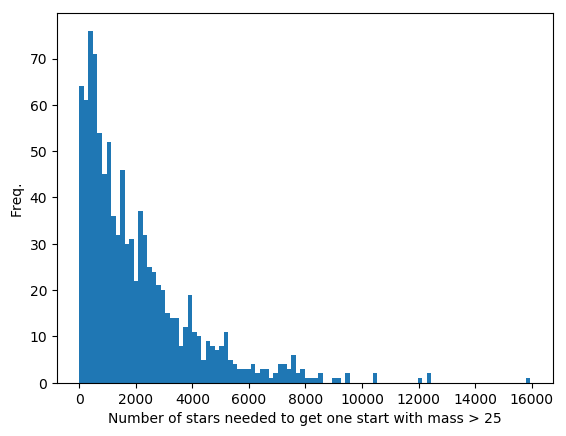

2049.133
2004.9092399336614


┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[10]:25
└ @ Core In[10]:25


In [10]:
# How many stars in the cluster that we need for the sun
N_clusters = 1000
nbr_stars_in_cluster = zeros(N_clusters)

for i in 1:N_clusters # loop over the number of clusters

    nbr_stars = 0
    generate_starts = true

    # generate stars in cluster i until we obtain one start  with mass > 25
    while generate_starts

        nbr_stars = nbr_stars + 1
        star_prop = hitandmiss(1)[1]

        if star_prop >= 25
            nbr_stars_in_cluster[i] = nbr_stars
            generate_starts = false
        end
    end

end

PyPlot.figure()
h = PyPlot.plt[:hist](nbr_stars_in_cluster,100)
PyPlot.xlabel("Number of stars needed to get one start with mass > 25")
PyPlot.ylabel("Freq.")

println(mean(nbr_stars_in_cluster))
println(std(nbr_stars_in_cluster))




Out simulations show that a cluster that contains a supernova with  $x \pm y= M_{\text{sn}} \geq 25 M_{\circ}$ likely containes $22049 \pm 2005$ number of stars, where $x$ is the average number of stars needed and y the standard deviation for the number of stars. However, we can also conclude that the distribution of stars that we need in a cluster such that we have one star with $M_{\text{sn}} \geq 25 M_{\circ}$ is exponential, which also means that the mean value $2027.5$ is not very infomative. Something that we also can conclude from the large standard deviation. 